In [1]:
#importing all important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

pd. set_option('display.max_columns', 1000) # or 1000.
pd. set_option('display.max_rows', 1000) # or 1000.

In [2]:
#reading csv file
df = pd.read_csv('H2HBABBA2252.csv')

In [3]:
#this shows only first five rows
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200974851,RESTA systems,NaN,2020.0,1.930646e+09,2020-03-12,20200312,20200312,20200401.0,USD,RV,1.0,NaN,1344.12,20200312.0,NAD1,1.930646e+09,1
1,U001,0200803720,DEC,2019-12-11 00:00:00,2019.0,1.930228e+09,2019-12-06,20191206,20191206,20191208.0,USD,RV,1.0,NaN,8885.49,20191201.0,NAM1,1.930228e+09,0
2,U001,0200729290,KROGER associates,2019-09-13 00:00:00,2019.0,1.929803e+09,2019-08-28,20190828,20190828,20190912.0,USD,RV,1.0,NaN,72979.17,20190828.0,NAA8,1.929803e+09,0
3,U001,0200771157,WEIS corporation,NaN,2020.0,1.930637e+09,2020-03-11,20200311,20200311,20200326.0,USD,RV,1.0,NaN,83162.79,20200311.0,NAA8,1.930637e+09,1
4,U001,0200726979,BJ'S systems,2019-09-03 00:00:00,2019.0,1.929767e+09,2019-08-18,20190820,20190818,20190902.0,USD,RV,1.0,NaN,1095.94,20190818.0,NAA8,1.929767e+09,0


In [4]:
# this tells us the total number of columns and rows present in dataset
df.shape

(50000, 19)

In [5]:
#Coverting to datetime format for creating target column
df['clear_date'] = pd.to_datetime(df['clear_date'])
df['due_in_date']= pd.to_datetime(df.due_in_date,format='%Y%m%d')

In [6]:
#target col "delay_date"
df['delay_date']=df['clear_date'] - df['due_in_date']
df['delay_date']=df['delay_date']/np.timedelta64(1,"D")
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay_date
0,U001,0200974851,RESTA systems,NaT,2020.0,1.930646e+09,2020-03-12,20200312,20200312,2020-04-01,USD,RV,1.0,NaN,1344.12,20200312.0,NAD1,1.930646e+09,1,NaN
1,U001,0200803720,DEC,2019-12-11,2019.0,1.930228e+09,2019-12-06,20191206,20191206,2019-12-08,USD,RV,1.0,NaN,8885.49,20191201.0,NAM1,1.930228e+09,0,3.0
2,U001,0200729290,KROGER associates,2019-09-13,2019.0,1.929803e+09,2019-08-28,20190828,20190828,2019-09-12,USD,RV,1.0,NaN,72979.17,20190828.0,NAA8,1.929803e+09,0,1.0
3,U001,0200771157,WEIS corporation,NaT,2020.0,1.930637e+09,2020-03-11,20200311,20200311,2020-03-26,USD,RV,1.0,NaN,83162.79,20200311.0,NAA8,1.930637e+09,1,NaN
4,U001,0200726979,BJ'S systems,2019-09-03,2019.0,1.929767e+09,2019-08-18,20190820,20190818,2019-09-02,USD,RV,1.0,NaN,1095.94,20190818.0,NAA8,1.929767e+09,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200331749,SYSC in,2019-08-07,2019.0,1.929646e+09,2019-07-22,20190722,20190722,2019-08-06,USD,RV,1.0,NaN,2911.59,20190722.0,NAA8,1.929646e+09,0,1.0
49996,U001,0200796637,MERCH corporation,2019-02-05,2019.0,1.928662e+09,2019-01-24,20190122,20190124,2019-02-08,USD,RV,1.0,NaN,34695.08,20190124.0,NAA8,1.928662e+09,0,-3.0
49997,CA02,140104340,COLABOR llc,2019-02-21,2019.0,2.960528e+09,2019-02-05,20190205,20190205,2019-02-17,CAD,RV,1.0,NaN,30772.82,20190207.0,CA10,2.960528e+09,0,4.0
49998,U001,0200769623,WAL-MAR,2019-12-04,2019.0,1.930185e+09,2019-11-24,20191122,20191124,2019-12-09,USD,RV,1.0,NaN,6532.60,20191124.0,NAH4,1.930185e+09,0,-5.0


## PREPROCESSING

In [7]:
# checking all null values present in every cols
df.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    4
isOpen                        0
delay_date                10000
dtype: int64

In [8]:
# SPLIT THE DATAPOINT OF TARGET COL WHICH HAVE NULL VALUE AND SAVE IT IN main_test
main_train = df[df.delay_date.isnull()==False]
main_test = df[df.delay_date.isnull()==True]

In [9]:
# checking the number of cols and rows present in main_trainSELECTION and main_test
main_train.shape, main_test.shape

((40000, 20), (10000, 20))

### NULL IMPUTATION

In [10]:
# checking the null values in main_train
main_train.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             40000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    4
isOpen                        0
delay_date                    0
dtype: int64

In [11]:
# checking null values in invoice_id as it shows it has 4 nulls present..
main_train[main_train.invoice_id.isnull()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay_date
3460,CA02,0140104409,LOB in,2019-05-08,2019.0,9.500000e+09,2019-03-29,20190329,20190225,2019-03-07,CAD,X2,1.0,NaN,15922.44,20190225.0,CA10,NaN,0,62.0
7592,CA02,0140106054,TREE trust,2019-05-31,2019.0,9.500000e+09,2019-03-29,20190329,20190307,2019-03-17,CAD,X2,1.0,NaN,1751.14,20190307.0,CA10,NaN,0,75.0
10423,CA02,0140104429,COSTCO in,2019-05-14,2019.0,9.500000e+09,2019-03-29,20190329,20190311,2019-03-21,CAD,X2,1.0,NaN,5353.20,20190311.0,CA10,NaN,0,54.0
41391,CA02,0140104409,LOB foundation,2019-05-08,2019.0,9.500000e+09,2019-03-29,20190329,20190224,2019-03-06,CAD,X2,1.0,NaN,16505.64,20190224.0,CA10,NaN,0,63.0


In [12]:
# drop if there are less row with null value
main_train.drop("invoice_id",axis=1,inplace=True)

In [13]:
# dropping area_business as it contains all null values
main_train.drop("area_business",axis=1,inplace=True)

In [14]:
# converting it into datetime form
main_train['posting_date']=pd.to_datetime(main_train['posting_date'])
main_train['document_create_date']= pd.to_datetime(main_train['document_create_date'], format="%Y%m%d")
main_train['baseline_create_date']= pd.to_datetime(main_train['baseline_create_date'], format="%Y%m%d")

### DUPLICATE/CONSTANT COL REMOVAL

In [15]:
# dropping document_create_date.1 and base_line_date as no need in future it's same as posting_date
main_train.drop("document_create_date.1",axis=1,inplace=True)
main_train.drop("baseline_create_date",axis=1,inplace=True)

In [16]:
# sorting unique cols in ascending order
main_train.nunique().sort_values(ascending=True)

posting_id                  1
isOpen                      1
buisness_year               2
invoice_currency            2
document type               2
business_code               5
cust_payment_terms         72
delay_date                182
clear_date                396
posting_date              423
document_create_date      426
due_in_date               489
cust_number              1340
name_customer            3952
total_open_amount       35596
doc_id                  39123
dtype: int64

In [17]:
# if unique counts==1 means that is constant column
main_train.drop("posting_id",axis=1,inplace=True)
main_train.drop("isOpen",axis=1,inplace=True)
main_train.drop("document type",axis=1,inplace=True)

In [18]:
# dropping invoice_currency col as business_code has the details of whether the amount is USD or CAD i.e. "U001 --> U represents USD"
# "CA02 --> CA represents CAD"
main_train.drop("invoice_currency",axis=1,inplace=True)

In [19]:
# sort data in ascending order based on the posting_date col
# we only use past data to train the model , hence sorting ensures that while splittig the data only past data is there on the train set
main_train.sort_values(by='posting_date', ascending =True, inplace=True)

In [20]:
# checking the main_train table
main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms,delay_date
19312,U001,0200769623,WAL-MAR systems,2019-01-09,2019.0,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,4397.29,NAH4,-5.0
48736,U001,0200769623,WAL-MAR,2019-01-10,2019.0,1.928534e+09,2018-12-30,2018-12-29,2019-01-14,12232.84,NAH4,-4.0
32732,U001,0200769623,WAL-MAR trust,2019-01-09,2019.0,1.928538e+09,2018-12-30,2018-12-29,2019-01-14,27481.20,NAH4,-5.0
8557,U001,0200769623,WAL-MAR corporation,2019-01-15,2019.0,1.928538e+09,2018-12-30,2018-12-29,2019-01-14,9471.98,NAH4,1.0
14836,U001,0200769623,WAL-MAR foundation,2019-01-15,2019.0,1.928541e+09,2018-12-30,2018-12-29,2019-01-14,4299.91,NAH4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
37601,U001,0200794332,COST trust,2020-03-11,2020.0,1.930566e+09,2020-02-26,2020-02-25,2020-03-12,2840.88,NAAX,-1.0
49266,CA02,0140105847,GORDON F foundation,2020-03-13,2020.0,2.960617e+09,2020-02-27,2020-02-27,2020-03-10,45364.85,CA10,3.0
28586,U001,0200759878,SA llc,2020-03-13,2020.0,1.930572e+09,2020-02-27,2020-02-26,2020-03-13,67857.32,NAH4,0.0
36161,U001,0200126819,MCLANE systems,2020-03-18,2020.0,1.930558e+09,2020-02-27,2020-02-22,2020-03-13,53264.58,NAA8,5.0


### SPLIT DATA

In [21]:
# importing train_test_split as we have to use it for splitting the dataset in train, test and val
from sklearn.model_selection import train_test_split

In [22]:
# Converting the main_train into X and y so that we can pass it onto train_test_split function

# X --> contains the dataframe without the target i.e delay_date
X = main_train.drop('delay_date',axis=1)

# y --> contains only the target value 
y = main_train['delay_date']

In [23]:
#splitting the data first into 2 part -- doing a 70:30 split i.e 70%--> train dataset, 30% -->intermediate test data set
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.3, random_state=0, shuffle = False)

In [24]:
#splitting from intermediate test dataset to 2 parts-- 50:50 split i.e 50%-->validation set, 50%-->test set 
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5, random_state=0, shuffle = False)

In [25]:
X_train.shape , X_val.shape , X_test.shape

((28000, 11), (6000, 11), (6000, 11))

## EDA

<AxesSubplot:xlabel='delay_date', ylabel='Density'>

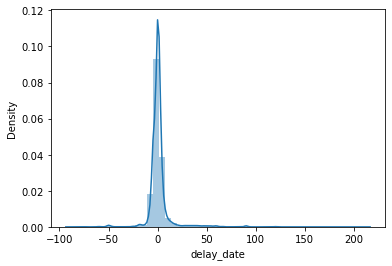

In [26]:
# making all these plots for better analysis of dataset w.r.t target col i.e. delay_date
# distribution of the target column i.e. delay_date
sns.distplot(y_train)

<AxesSubplot:xlabel='delay_date', ylabel='Count'>

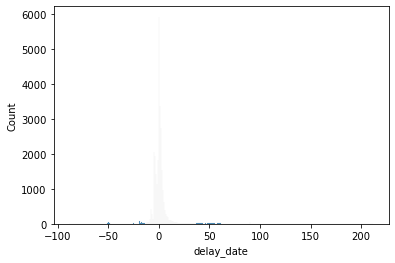

In [27]:
# using hisplot for better analysis
sns.histplot(y_train)

In [28]:
# merging y_train -->output col with X_train just to analyze w.r.t target col
X_train.merge(y_train,on = X_train.index)

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms,delay_date
0,19312,U001,0200769623,WAL-MAR systems,2019-01-09,2019.0,1.928540e+09,2018-12-30,2018-12-29,2019-01-14,4397.29,NAH4,-5.0
1,48736,U001,0200769623,WAL-MAR,2019-01-10,2019.0,1.928534e+09,2018-12-30,2018-12-29,2019-01-14,12232.84,NAH4,-4.0
2,32732,U001,0200769623,WAL-MAR trust,2019-01-09,2019.0,1.928538e+09,2018-12-30,2018-12-29,2019-01-14,27481.20,NAH4,-5.0
3,8557,U001,0200769623,WAL-MAR corporation,2019-01-15,2019.0,1.928538e+09,2018-12-30,2018-12-29,2019-01-14,9471.98,NAH4,1.0
4,14836,U001,0200769623,WAL-MAR foundation,2019-01-15,2019.0,1.928541e+09,2018-12-30,2018-12-29,2019-01-14,4299.91,NAH4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,30104,U001,0200418007,AM associates,2019-10-23,2019.0,1.929978e+09,2019-10-08,2019-10-07,2019-10-23,53939.02,NAA8,0.0
27996,23402,U001,0200712105,WALG foundation,2019-10-23,2019.0,1.929987e+09,2019-10-08,2019-10-08,2019-10-23,102063.26,NAA8,0.0
27997,39,U001,0200763814,SYSCO F systems,2019-10-25,2019.0,1.929986e+09,2019-10-08,2019-10-08,2019-10-23,14006.35,NAA8,2.0
27998,13447,U001,0200148860,DOLLA us,2019-10-23,2019.0,1.929977e+09,2019-10-08,2019-10-07,2019-10-23,85463.19,NAA8,0.0


<AxesSubplot:xlabel='delay_date', ylabel='total_open_amount'>

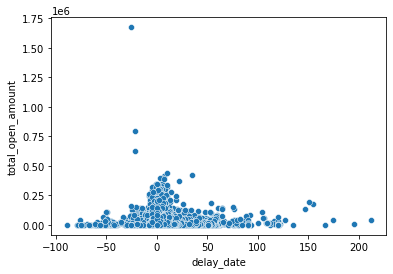

In [29]:
# scatterplot b/w delay_date and total_open_amount
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="delay_date", y="total_open_amount")

<AxesSubplot:xlabel='delay_date', ylabel='clear_date'>

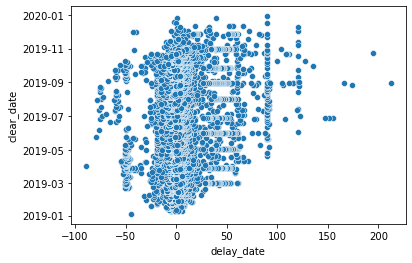

In [30]:
# scatterplot b/w delay_date and clear_date
sns.scatterplot(data = X_train.merge(y_train,on=X_train.index), x = "delay_date" , y = "clear_date")

AxesSubplot(0.125,0.125;0.775x0.755)


U001    36153
CA02     3166
U013      520
U002      151
U005       10
Name: business_code, dtype: int64

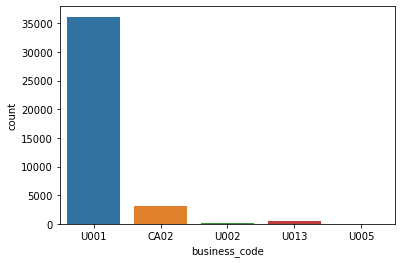

In [31]:
# countplot just to check which have the more occurence in business_code
print(sns.countplot(main_train['business_code']))

# ~90% of the business code is U001
main_train['business_code'].value_counts() 

## FEATURE ENGINEERING

In [32]:
#convert all cols into int/float format because machine only understand the numeric format not str....

# info() gives all information related to each and every cols
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28000 entries, 19312 to 44294
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         28000 non-null  object        
 1   cust_number           28000 non-null  object        
 2   name_customer         28000 non-null  object        
 3   clear_date            28000 non-null  datetime64[ns]
 4   buisness_year         28000 non-null  float64       
 5   doc_id                28000 non-null  float64       
 6   posting_date          28000 non-null  datetime64[ns]
 7   document_create_date  28000 non-null  datetime64[ns]
 8   due_in_date           28000 non-null  datetime64[ns]
 9   total_open_amount     28000 non-null  float64       
 10  cust_payment_terms    28000 non-null  object        
dtypes: datetime64[ns](4), float64(3), object(4)
memory usage: 2.1+ MB


In [33]:
# importing LABEL ENCODER
from sklearn.preprocessing import LabelEncoder

In [34]:
# function will delete a column from train , val and test
def fun_drop(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

In [35]:
# Encoding business_code to business_code_enc 
business_code_encoder = LabelEncoder()
business_code_encoder.fit(X_train['business_code'])
X_train['business_code_enc'] = business_code_encoder.transform(X_train['business_code'])
X_val['business_code_enc'] = business_code_encoder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_code_encoder.transform(X_test['business_code'])

In [36]:
# dropping business_code
X_train,X_val,X_test = fun_drop(["business_code"])

In [37]:
# Encoding name_customer to name_customer_enc
name_customer_enc = LabelEncoder()
name_customer_enc.fit(X_train["name_customer"])
X_train["name_customer_enc"]=name_customer_enc.transform(X_train["name_customer"])

In [38]:
name_customer_enc.fit(X_test["name_customer"])
X_test["name_customer_enc"]=name_customer_enc.transform(X_test["name_customer"])

In [39]:
name_customer_enc.fit(X_val["name_customer"])
X_val["name_customer_enc"]=name_customer_enc.transform(X_val["name_customer"])

In [40]:
# dropping name_customer
X_train,X_val,X_test = fun_drop(["name_customer"])

In [41]:
# Encoding cust_payment_terms to cust_payment_terms_enc
cust_payment_terms_enc = LabelEncoder()
cust_payment_terms_enc.fit(X_train["cust_payment_terms"])
X_train["cust_payment_terms_enc"]=cust_payment_terms_enc.transform(X_train["cust_payment_terms"])

In [42]:
cust_payment_terms_enc.fit(X_test["cust_payment_terms"])
X_test["cust_payment_terms_enc"]=cust_payment_terms_enc.transform(X_test["cust_payment_terms"])

In [43]:
cust_payment_terms_enc.fit(X_val["cust_payment_terms"])
X_val["cust_payment_terms_enc"]=cust_payment_terms_enc.transform(X_val["cust_payment_terms"])

In [44]:
# dropping cust_payment_terms 
X_train,X_val,X_test = fun_drop(["cust_payment_terms"])

In [45]:
# cust_number is a mixed col
# labels and number in same observation
mixed_cust_num="cust_number"
mixed_num_in_cust_num= mixed_cust_num + "_numerical"
mixed_label_in_cust_num= mixed_cust_num + "_label"

In [46]:
# extract any digits
X_train[mixed_num_in_cust_num]=X_train[mixed_cust_num].str.extract('(\d+)')

# extract first 3 letters
X_train[mixed_label_in_cust_num]=X_train[mixed_cust_num].str[:3]

# change it in int format
X_train["cust_number_numerical"]=X_train.cust_number_numerical.astype(int)

In [47]:
X_test[mixed_num_in_cust_num]=X_test[mixed_cust_num].str.extract('(\d+)')
X_test[mixed_label_in_cust_num]=X_test[mixed_cust_num].str[:3]
X_test["cust_number_numerical"]=X_test.cust_number_numerical.astype(int)

In [48]:
X_val[mixed_num_in_cust_num]=X_val[mixed_cust_num].str.extract('(\d+)')
X_val[mixed_label_in_cust_num]=X_val[mixed_cust_num].str[:3]
X_val["cust_number_numerical"]=X_val.cust_number_numerical.astype(int)

In [49]:
# Encoding cust_number_label to cust_number_label_enc
cust_number_label_enc = LabelEncoder()
cust_number_label_enc.fit(X_train["cust_number_label"])
X_train["cust_number_label_enc"]=cust_number_label_enc.transform(X_train["cust_number_label"])

In [50]:
cust_number_label_enc.fit(X_test["cust_number_label"])
X_test["cust_number_label_enc"]=cust_number_label_enc.transform(X_test["cust_number_label"])

In [51]:
cust_number_label_enc.fit(X_val["cust_number_label"])
X_val["cust_number_label_enc"]=cust_number_label_enc.transform(X_val["cust_number_label"])

In [52]:
# dropping cust_number and cust_number_label
X_train,X_val,X_test = fun_drop(["cust_number"])
X_train,X_val,X_test = fun_drop(["cust_number_label"])

In [53]:
# posting_date 
# extract day, month and year
X_train['year_of_posting_date']= X_train['posting_date'].dt.year
X_train['day_of_posting_date'] = X_train['posting_date'].dt.day
X_train['month_of_posting_date'] = X_train['posting_date'].dt.month

X_val['year_of_posting_date']= X_val['posting_date'].dt.year
X_val['day_of_posting_date'] = X_val['posting_date'].dt.day
X_val['month_of_posting_date'] = X_val['posting_date'].dt.month

X_test['year_of_posting_date']= X_test['posting_date'].dt.year
X_test['day_of_posting_date'] = X_test['posting_date'].dt.day
X_test['month_of_posting_date'] = X_test['posting_date'].dt.month

# due_in_date
X_train['year_of_due_in_date']= X_train['due_in_date'].dt.year
X_train['day_of_due_in_date'] = X_train['due_in_date'].dt.day
X_train['month_of_due_in_date'] = X_train['due_in_date'].dt.month

X_val['year_of_due_in_date']= X_val['due_in_date'].dt.year
X_val['day_of_due_in_date'] = X_val['due_in_date'].dt.day
X_val['month_of_due_in_date'] = X_val['due_in_date'].dt.month

X_test['year_of_due_in_date']= X_test['due_in_date'].dt.year
X_test['day_of_due_in_date'] = X_test['due_in_date'].dt.day
X_test['month_of_due_in_date'] = X_test['due_in_date'].dt.month

# document_create_date
X_train['year_of_document_create_date']= X_train['document_create_date'].dt.year
X_train['day_of_document_create_date'] = X_train['document_create_date'].dt.day
X_train['month_of_document_create_date'] = X_train['document_create_date'].dt.month

X_val['year_of_document_create_date']= X_val['document_create_date'].dt.year
X_val['day_of_document_create_date'] = X_val['document_create_date'].dt.day
X_val['month_of_document_create_date'] = X_val['document_create_date'].dt.month

X_test['year_of_document_create_date']= X_test['document_create_date'].dt.year
X_test['day_of_document_create_date'] = X_test['document_create_date'].dt.day
X_test['month_of_document_create_date'] = X_test['document_create_date'].dt.month

In [54]:
# dropping posting_date, due_in_date and document_create_date
X_train ,X_val, X_test = fun_drop(['posting_date'])
X_train ,X_val, X_test = fun_drop(['due_in_date'])
X_train ,X_val, X_test = fun_drop(['document_create_date'])

In [55]:
# dropping clear_date as it is in timedate format and i don't need it for future, it's only going to increase col
X_train,X_val,X_test = fun_drop(["clear_date"])

In [56]:
# every cols are in int/float format
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28000 entries, 19312 to 44294
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   buisness_year                  28000 non-null  float64
 1   doc_id                         28000 non-null  float64
 2   total_open_amount              28000 non-null  float64
 3   business_code_enc              28000 non-null  int32  
 4   name_customer_enc              28000 non-null  int32  
 5   cust_payment_terms_enc         28000 non-null  int32  
 6   cust_number_numerical          28000 non-null  int32  
 7   cust_number_label_enc          28000 non-null  int32  
 8   year_of_posting_date           28000 non-null  int64  
 9   day_of_posting_date            28000 non-null  int64  
 10  month_of_posting_date          28000 non-null  int64  
 11  year_of_due_in_date            28000 non-null  int64  
 12  day_of_due_in_date             28000 non-n

## FEATURE SELECTION

In [57]:
# Feature Selection
# in this we gonna select the features which are going to help our model to do better prediction

# merging delay_date with X_train as we are going to check the highly correlation w.r.t to delay_date
X_train.merge(y_train,on=X_train.index).corr()

,key_0,buisness_year,doc_id,total_open_amount,business_code_enc,name_customer_enc,cust_payment_terms_enc,cust_number_numerical,cust_number_label_enc,year_of_posting_date,day_of_posting_date,month_of_posting_date,year_of_due_in_date,day_of_due_in_date,month_of_due_in_date,year_of_document_create_date,day_of_document_create_date,month_of_document_create_date,delay_date
key_0,1.000000,NaN,-0.007878,0.011343,-3.838594e-03,0.010633,-0.002728,0.004169,-0.000859,0.004848,0.000206,-0.006239,-2.598938e-03,-0.009523,-0.003000,0.006590,-0.003134,-0.006780,0.003741
buisness_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doc_id,-0.007878,NaN,1.000000,0.158801,-5.868859e-01,-0.019007,-0.498793,-0.330190,-0.174914,0.003223,0.010167,0.013164,2.744644e-05,-0.001543,0.000460,0.010319,0.015795,0.012790,0.157194
total_open_amount,0.011343,NaN,0.158801,1.000000,-1.215955e-01,-0.016429,-0.191418,-0.015775,-0.081163,0.006497,0.017364,-0.004080,1.667583e-04,-0.009247,-0.008868,0.012167,0.024985,-0.005476,0.003594
business_code_enc,-0.003839,NaN,-0.586886,-0.121596,1.000000e+00,-0.026821,0.540006,0.008001,0.126541,0.000391,0.012079,-0.022134,1.336124e-12,0.005905,0.014365,-0.004631,0.008040,-0.023553,-0.014541
name_customer_enc,0.010633,NaN,-0.019007,-0.016429,-2.682118e-02,1.000000,0.092688,0.116617,-0.012865,-0.014909,-0.007317,-0.000583,1.487016e-03,0.003341,-0.014587,-0.014971,-0.007832,-0.000459,-0.019022
cust_payment_terms_enc,-0.002728,NaN,-0.498793,-0.191418,5.400058e-01,0.092688,1.000000,-0.114121,0.388326,-0.002089,-0.006109,0.003888,-4.127747e-03,0.004208,0.038291,-0.006028,-0.004789,0.003021,0.048461
cust_number_numerical,0.004169,NaN,-0.330190,-0.015775,8.000690e-03,0.116617,-0.114121,1.000000,-0.519041,-0.011360,-0.012010,-0.003400,1.402392e-02,-0.007150,-0.016934,-0.015967,-0.009532,0.000280,-0.393550
cust_number_label_enc,-0.000859,NaN,-0.174914,-0.081163,1.265411e-01,-0.012865,0.388326,-0.519041,1.000000,0.010638,-0.012808,-0.019262,-3.725000e-02,0.014402,-0.014848,0.015653,-0.009671,-0.023984,0.313447
year_of_posting_date,0.004848,NaN,0.003223,0.006497,3.914941e-04,-0.014909,-0.002089,-0.011360,0.010638,1.000000,-0.114036,-0.174750,8.791012e-02,0.005403,0.114592,0.817716,-0.107793,-0.171906,0.000107


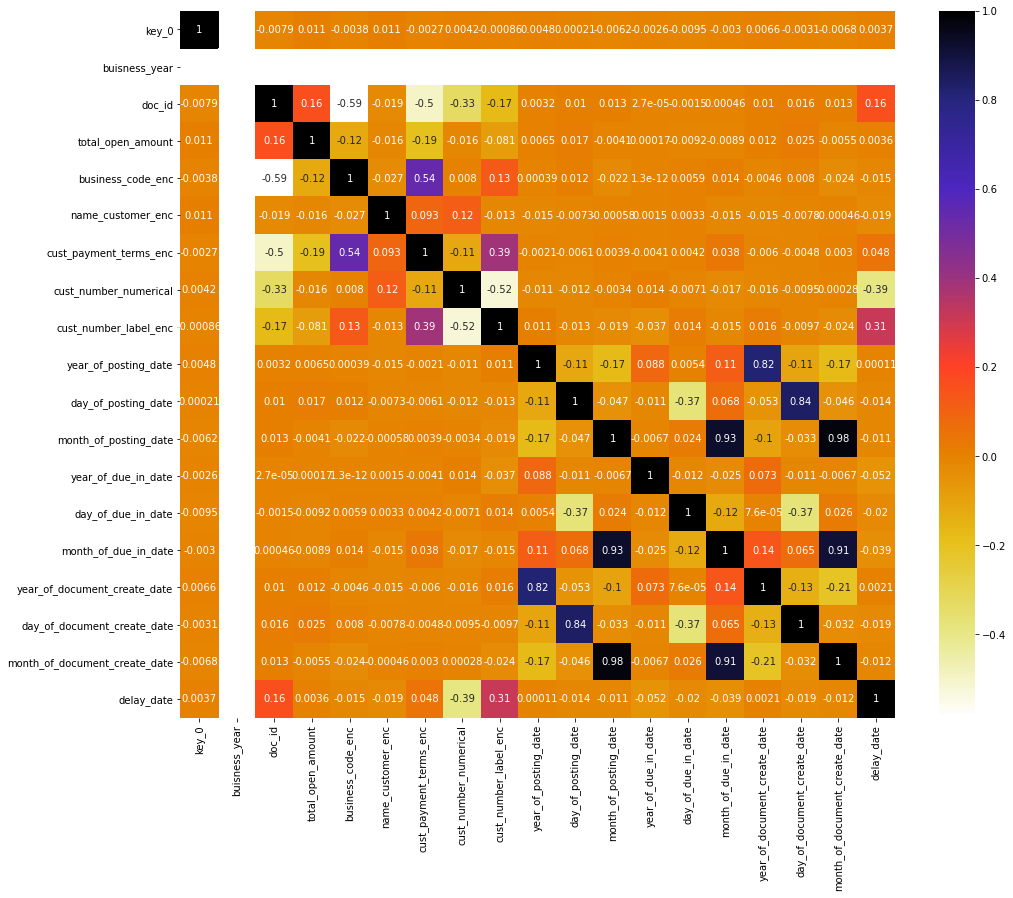

In [58]:
# plt.subplots(figsize=(16,13))
#heatmap
#Pearson Correlation Features --> used to check the correlation b/w each cols w.r.t delay_date
colormap = plt.cm.RdBu
plt.figure(figsize=(16,13))
cor = X_train.merge(y_train,on=X_train.index).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [59]:
#fun that will check the correlation i.e. which are highly correlated
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [60]:
# this tells us that how many(in num) highly correlated cols present
corr_features = correlation(X_train.merge(y_train,on=X_train.index), 0.8)
len(set(corr_features))

4

In [61]:
# this shows the cols name which are highly correlated and which needs to remove 
corr_features

{'day_of_document_create_date',
 'month_of_document_create_date',
 'month_of_due_in_date',
 'year_of_document_create_date'}

In [62]:
#dropping all these as they are highly correlated
X_train,X_val ,X_test = fun_drop(['day_of_document_create_date',
 'month_of_document_create_date',
 'month_of_due_in_date',
 'year_of_document_create_date'])

In [63]:
# here you can see buisness_year is a constant column hence should be dropped 
X_train,X_val ,X_test = fun_drop(['buisness_year'])

## MODELLING

In [64]:
# Linear regression algorithm
# just applying it for better understanding
# for my better understanding b/w linear regression and tree based model

# importing LinearRegression

from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train,y_train)

LinearRegression()

In [65]:
y_predict=base_model.predict(X_val)

# using mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, y_predict, squared=False)


6.024405654960674

In [66]:
# Tree based model
# importing treeRegressor
# using this because the ouliers doesn't impact the tree based model

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [67]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [68]:
y_predict2 = regressor.predict(X_val)

In [69]:
mean_squared_error(y_val, y_predict2, squared=False)

7.305015496285397

In [70]:
#Once you think you have good enough result do a prediction on the X_test set just to confirm that the model is not getting overfitted

y_predict_test = regressor.predict(X_test)
mean_squared_error(y_test, y_predict_test, squared=False)

11.700600635818411

### THE LOST DATA

In [71]:
# see again delay_date is all nan
main_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay_date
0,U001,0200974851,RESTA systems,NaT,2020.0,1.930646e+09,2020-03-12,20200312,20200312,2020-04-01,USD,RV,1.0,NaN,1344.12,20200312.0,NAD1,1.930646e+09,1,NaN
3,U001,0200771157,WEIS corporation,NaT,2020.0,1.930637e+09,2020-03-11,20200311,20200311,2020-03-26,USD,RV,1.0,NaN,83162.79,20200311.0,NAA8,1.930637e+09,1,NaN
8,U001,0200759878,SA systems,NaT,2020.0,1.930772e+09,2020-04-12,20200410,20200412,2020-04-27,USD,RV,1.0,NaN,15123.85,20200412.0,NAH4,1.930772e+09,1,NaN
9,U001,0100000222,SMITHFIE co,NaT,2020.0,1.930579e+09,2020-03-04,20200302,20200304,2020-03-19,USD,RV,1.0,NaN,31720.25,20200304.0,NAA8,1.930579e+09,1,NaN
14,U001,0200707822,PUBLI corporation,NaT,2020.0,1.930585e+09,2020-02-29,20200229,20200229,2020-03-15,USD,RV,1.0,NaN,91806.70,20200229.0,NAA8,1.930585e+09,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49978,U001,0200152991,JET in,NaT,2020.0,1.930791e+09,2020-04-16,20200415,20200416,2020-05-01,USD,RV,1.0,NaN,3296.76,20200416.0,NAA8,1.930791e+09,1,NaN
49980,U001,0200769623,WAL-MAR llc,NaT,2020.0,1.930773e+09,2020-04-12,20200410,20200412,2020-04-27,USD,RV,1.0,NaN,17617.59,20200412.0,NAH4,1.930773e+09,1,NaN
49987,CA02,0140104475,FOC corporation,NaT,2020.0,2.960630e+09,2020-04-24,20200424,20200424,2020-05-13,CAD,RV,1.0,NaN,4154.60,20200503.0,CA10,2.960630e+09,1,NaN
49989,U001,0200780825,SYSCO FO co,NaT,2020.0,1.930596e+09,2020-03-03,20200303,20200303,2020-03-18,USD,RV,1.0,NaN,24680.74,20200303.0,NAA8,1.930596e+09,1,NaN


#### we have to bring the main_test in same format as that of the X_train
#### perform all preprocessing, feature engineering, feature selection and fed to model and predict steps again
#### why no EDA ? -- Becz EDA is done only on the train set

In [72]:
#preprocessing
#Null / constant / duplicate drop same steps
main_test.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             10000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
delay_date                10000
dtype: int64

In [73]:
# drop delay_date and clear_date columns as we are going to predict delay_date + its null
X_main_test= main_test.drop(["delay_date","clear_date"],axis =1)
X_main_test

# ALSO LETS DROP IT FROM MAIN TEST ITSELF
main_test.drop(["delay_date","clear_date"],inplace=True,axis=1)

In [74]:
# drop if there are less row with null value
# dropping invoice id
X_main_test.drop("invoice_id",axis=1,inplace=True) 

In [75]:
# dropping area_business as it contains all null values
X_main_test.drop("area_business",axis=1,inplace=True)

In [76]:
# converting it into datetime form
X_main_test['posting_date']=pd.to_datetime(X_main_test['posting_date'])
X_main_test['document_create_date']= pd.to_datetime(X_main_test['document_create_date'], format="%Y%m%d")
X_main_test['baseline_create_date']= pd.to_datetime(X_main_test['baseline_create_date'], format="%Y%m%d")

In [77]:
# dropping document_create_date.1 and base_line_date as no need in future it's same as posting_date
X_main_test.drop("document_create_date.1",axis=1,inplace=True)
X_main_test.drop("baseline_create_date",axis=1,inplace=True)

In [78]:
# if unique counts==1 means that is constant column
X_main_test.drop("posting_id",axis=1,inplace=True)
X_main_test.drop("isOpen",axis=1,inplace=True)
X_main_test.drop("document type",axis=1,inplace=True) #contain same value "RV"

In [79]:
# dropping invoice_currency col as business_code has the details of whether the amount is USD or CAD
X_main_test.drop("invoice_currency",axis=1,inplace=True)

In [80]:
# sort data in ascending order based on the posting_date col
# we only use past data to train the model , hence sorting ensures that while splittig the data only past data is there on the test set
X_main_test.sort_values(by='posting_date', ascending =True, inplace=True)

In [81]:
# Changing the dtype 
X_main_test["doc_id"]=X_main_test.doc_id.astype(int)
X_main_test["buisness_year"]=X_main_test.buisness_year.astype(int)

In [82]:
X_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 29943 to 13411
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         10000 non-null  object        
 1   cust_number           10000 non-null  object        
 2   name_customer         10000 non-null  object        
 3   buisness_year         10000 non-null  int32         
 4   doc_id                10000 non-null  int32         
 5   posting_date          10000 non-null  datetime64[ns]
 6   document_create_date  10000 non-null  datetime64[ns]
 7   due_in_date           10000 non-null  datetime64[ns]
 8   total_open_amount     10000 non-null  float64       
 9   cust_payment_terms    10000 non-null  object        
dtypes: datetime64[ns](3), float64(1), int32(2), object(4)
memory usage: 625.0+ KB


In [83]:
# function will delete a column from X_main_test
def fun_drop(col , traindf = X_main_test):
    traindf.drop(col,inplace=True,axis=1)
    return traindf

In [84]:
# Encoding business_code to business_code_enc 
business_code_enc = LabelEncoder()
business_code_enc.fit(X_main_test["business_code"])
X_main_test["business_code_enc"]=business_code_encoder.transform(X_main_test["business_code"])

In [85]:
X_main_test = fun_drop(["business_code"])

In [86]:
# Encoding name_customer to name_customer_enc
name_customer_enc = LabelEncoder()
name_customer_enc.fit(X_main_test["name_customer"])
X_main_test["name_customer_enc"]=name_customer_enc.transform(X_main_test["name_customer"])

In [87]:
X_main_test = fun_drop(["name_customer"])

In [88]:
# Encoding cust_payment_terms to cust_payment_terms_enc
cust_payment_terms_enc = LabelEncoder()
cust_payment_terms_enc.fit(X_main_test["cust_payment_terms"])
X_main_test["cust_payment_terms_enc"]=cust_payment_terms_enc.transform(X_main_test["cust_payment_terms"])

In [89]:
X_main_test= fun_drop(["cust_payment_terms"])

In [90]:
# cust_number is a mixed col
# labels and number in same observation
mixed_cust_num="cust_number"
mixed_num_in_cust_num= mixed_cust_num + "_numerical"
mixed_label_in_cust_num= mixed_cust_num + "_label"

In [91]:
# extract any digits
X_main_test[mixed_num_in_cust_num]=X_main_test[mixed_cust_num].str.extract('(\d+)')

# extract first 3 letters
X_main_test[mixed_label_in_cust_num]=X_main_test[mixed_cust_num].str[:3]

# change it in int format
X_main_test["cust_number_numerical"]=X_main_test.cust_number_numerical.astype(int)

In [92]:
# Encoding cust_number_label to cust_number_label_enc
cust_number_label_enc = LabelEncoder()
cust_number_label_enc.fit(X_main_test["cust_number_label"])
X_main_test["cust_number_label_enc"]=cust_number_label_enc.transform(X_main_test["cust_number_label"])

In [93]:
X_main_test = fun_drop(["cust_number"])
X_main_test = fun_drop(["cust_number_label"])

In [94]:
# posting_date 
# extract day, month and year

X_main_test['year_of_posting_date']= X_main_test['posting_date'].dt.year
X_main_test['day_of_posting_date'] = X_main_test['posting_date'].dt.day
X_main_test['month_of_posting_date'] = X_main_test['posting_date'].dt.month

# due_in_date

X_main_test['year_of_due_in_date']= X_main_test['due_in_date'].dt.year
X_main_test['day_of_due_in_date'] = X_main_test['due_in_date'].dt.day
X_main_test['month_of_due_in_date'] = X_main_test['due_in_date'].dt.month

# document_create_date

X_main_test['year_of_document_create_date']= X_main_test['document_create_date'].dt.year
X_main_test['day_of_document_create_date'] = X_main_test['document_create_date'].dt.day
X_main_test['month_of_document_create_date'] = X_main_test['document_create_date'].dt.month

In [95]:
X_main_test = fun_drop(["posting_date"])
X_main_test = fun_drop(["due_in_date"])
X_main_test = fun_drop(["document_create_date"])

In [96]:
X_main_test = fun_drop(['day_of_document_create_date',
 'month_of_document_create_date',
 'month_of_due_in_date',
 'year_of_document_create_date'])

In [97]:
# here you can see buisness_year is a constant column hence should be dropped
X_main_test = fun_drop(["buisness_year"])

### Both the dataframes are having same number of columns

In [98]:
X_train.columns

Index(['doc_id', 'total_open_amount', 'business_code_enc', 'name_customer_enc',
       'cust_payment_terms_enc', 'cust_number_numerical',
       'cust_number_label_enc', 'year_of_posting_date', 'day_of_posting_date',
       'month_of_posting_date', 'year_of_due_in_date', 'day_of_due_in_date'],
      dtype='object')

In [99]:
X_main_test.columns

Index(['doc_id', 'total_open_amount', 'business_code_enc', 'name_customer_enc',
       'cust_payment_terms_enc', 'cust_number_numerical',
       'cust_number_label_enc', 'year_of_posting_date', 'day_of_posting_date',
       'month_of_posting_date', 'year_of_due_in_date', 'day_of_due_in_date'],
      dtype='object')

## THE FINAL STEP

In [100]:
# Now it's time for Prediction 
final_result = regressor.predict(X_main_test)

In [101]:
final_result = pd.Series(final_result,name='delay_date')

In [102]:
# resetting the index of main test so that we can merge delay_date series with it
main_test.reset_index(drop=True,inplace=True)

In [103]:
# merging the main_test with final_result 
Final = main_test.merge(final_result , on = X_main_test.index )
Final 

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay_date
0,29943,U001,0200974851,RESTA systems,2020.0,1.930646e+09,2020-03-12,20200312,20200312,2020-04-01,USD,RV,1.0,NaN,1344.12,20200312.0,NAD1,1.930646e+09,1,1.325401
1,38344,U001,0200771157,WEIS corporation,2020.0,1.930637e+09,2020-03-11,20200311,20200311,2020-03-26,USD,RV,1.0,NaN,83162.79,20200311.0,NAA8,1.930637e+09,1,8.209416
2,20200,U001,0200759878,SA systems,2020.0,1.930772e+09,2020-04-12,20200410,20200412,2020-04-27,USD,RV,1.0,NaN,15123.85,20200412.0,NAH4,1.930772e+09,1,1.325401
3,38363,U001,0100000222,SMITHFIE co,2020.0,1.930579e+09,2020-03-04,20200302,20200304,2020-03-19,USD,RV,1.0,NaN,31720.25,20200304.0,NAA8,1.930579e+09,1,1.325401
4,38473,U001,0200707822,PUBLI corporation,2020.0,1.930585e+09,2020-02-29,20200229,20200229,2020-03-15,USD,RV,1.0,NaN,91806.70,20200229.0,NAA8,1.930585e+09,1,8.209416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2694,U001,0200152991,JET in,2020.0,1.930791e+09,2020-04-16,20200415,20200416,2020-05-01,USD,RV,1.0,NaN,3296.76,20200416.0,NAA8,1.930791e+09,1,1.325401
9996,187,U001,0200769623,WAL-MAR llc,2020.0,1.930773e+09,2020-04-12,20200410,20200412,2020-04-27,USD,RV,1.0,NaN,17617.59,20200412.0,NAH4,1.930773e+09,1,1.325401
9997,8554,CA02,0140104475,FOC corporation,2020.0,2.960630e+09,2020-04-24,20200424,20200424,2020-05-13,CAD,RV,1.0,NaN,4154.60,20200503.0,CA10,2.960630e+09,1,1.325401
9998,10592,U001,0200780825,SYSCO FO co,2020.0,1.930596e+09,2020-03-03,20200303,20200303,2020-03-18,USD,RV,1.0,NaN,24680.74,20200303.0,NAA8,1.930596e+09,1,1.325401


In [104]:
# checking the value counts for delay_date
# hence PREDICTED

Final.delay_date.value_counts()

 1.325401     5542
 8.209416     3273
-0.673085      529
-10.670282     290
-50.512821     204
-2.051783       80
 3.933610       76
 37.068966       4
-9.500000        2
Name: delay_date, dtype: int64

In [105]:
Final['delay_date']

0       1.325401
1       8.209416
2       1.325401
3       1.325401
4       8.209416
          ...   
9995    1.325401
9996    1.325401
9997    1.325401
9998    1.325401
9999    1.325401
Name: delay_date, Length: 10000, dtype: float64

In [106]:
# convert delay_date column into int
Final['delay_date']=np.round(final_result, 0).astype('int')

In [107]:
# this will give in the form date(i mean clear date)
Final['clear_payment_date'] = Final['due_in_date'] + pd.to_timedelta(Final['delay_date'], unit='D')

In [108]:
Final['clear_payment_date']

0      2020-04-02
1      2020-04-03
2      2020-04-28
3      2020-03-20
4      2020-03-23
          ...    
9995   2020-05-02
9996   2020-04-28
9997   2020-05-14
9998   2020-03-19
9999   2020-03-22
Name: clear_payment_date, Length: 10000, dtype: datetime64[ns]

In [109]:
Final["clear_payment_date"]= pd.to_datetime(Final.clear_payment_date)
Final["due_in_date"]= pd.to_datetime(Final.due_in_date)
Final["posting_date"]= pd.to_datetime(Final.posting_date)

In [110]:
Final.rename(columns={"cust_number":"customer_number"}, inplace=True)
Final.rename(columns={"name_customer":"customer_name"}, inplace=True)
Final.rename(columns={"due_in_date":"due_date"}, inplace=True)
Final.rename(columns={"total_open_amount":"invoice_amount"}, inplace=True)
Final.rename(columns={"invoice_id":"invoice_number"}, inplace=True)
Final.rename(columns={"clear_payment_date":"predicted_payment_date"}, inplace=True)

In [111]:
Final.to_csv('Final.csv',index=False)

In [112]:
# Categorize the invoice into different buckets based on predicted payment date .
def bucketization(x):
    if x<0:
        return('(< 0) Days')
    if x in range(0,16):
        return('(0-15) Days')
    elif x in range(16,31):
        return('(16-30) Days')
    elif x in range(31,45):
        return('(31-45) Days')
    elif x in range(45,60):
        return('(45-60) Days')
    else:
        return('(> 60) Days')

In [113]:
data = Final.reset_index(drop=True)

data['bucket_days']= pd.Series([bucketization(x=Final['delay_date'][i])  for i in range(len(data))])

bucket_mapper = {'(< 0) Days':0,'(0-15) Days':1,'(16-30) Days':2,'(31-45) Days':4,'(45-60) Days':5,'(> 60) Days':6}

data['bucket_id'] = data['bucket_days'].map(bucket_mapper)

data.columns

Index(['key_0', 'business_code', 'customer_number', 'customer_name',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'invoice_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_number',
       'isOpen', 'delay_date', 'predicted_payment_date', 'bucket_days',
       'bucket_id'],
      dtype='object')

In [114]:
data

,key_0,business_code,customer_number,customer_name,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_date,invoice_currency,document type,posting_id,area_business,invoice_amount,baseline_create_date,cust_payment_terms,invoice_number,isOpen,delay_date,predicted_payment_date,bucket_days,bucket_id
0,29943,U001,0200974851,RESTA systems,2020.0,1.930646e+09,2020-03-12,20200312,20200312,2020-04-01,USD,RV,1.0,NaN,1344.12,20200312.0,NAD1,1.930646e+09,1,1,2020-04-02,(0-15) Days,1
1,38344,U001,0200771157,WEIS corporation,2020.0,1.930637e+09,2020-03-11,20200311,20200311,2020-03-26,USD,RV,1.0,NaN,83162.79,20200311.0,NAA8,1.930637e+09,1,8,2020-04-03,(0-15) Days,1
2,20200,U001,0200759878,SA systems,2020.0,1.930772e+09,2020-04-12,20200410,20200412,2020-04-27,USD,RV,1.0,NaN,15123.85,20200412.0,NAH4,1.930772e+09,1,1,2020-04-28,(0-15) Days,1
3,38363,U001,0100000222,SMITHFIE co,2020.0,1.930579e+09,2020-03-04,20200302,20200304,2020-03-19,USD,RV,1.0,NaN,31720.25,20200304.0,NAA8,1.930579e+09,1,1,2020-03-20,(0-15) Days,1
4,38473,U001,0200707822,PUBLI corporation,2020.0,1.930585e+09,2020-02-29,20200229,20200229,2020-03-15,USD,RV,1.0,NaN,91806.70,20200229.0,NAA8,1.930585e+09,1,8,2020-03-23,(0-15) Days,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2694,U001,0200152991,JET in,2020.0,1.930791e+09,2020-04-16,20200415,20200416,2020-05-01,USD,RV,1.0,NaN,3296.76,20200416.0,NAA8,1.930791e+09,1,1,2020-05-02,(0-15) Days,1
9996,187,U001,0200769623,WAL-MAR llc,2020.0,1.930773e+09,2020-04-12,20200410,20200412,2020-04-27,USD,RV,1.0,NaN,17617.59,20200412.0,NAH4,1.930773e+09,1,1,2020-04-28,(0-15) Days,1
9997,8554,CA02,0140104475,FOC corporation,2020.0,2.960630e+09,2020-04-24,20200424,20200424,2020-05-13,CAD,RV,1.0,NaN,4154.60,20200503.0,CA10,2.960630e+09,1,1,2020-05-14,(0-15) Days,1
9998,10592,U001,0200780825,SYSCO FO co,2020.0,1.930596e+09,2020-03-03,20200303,20200303,2020-03-18,USD,RV,1.0,NaN,24680.74,20200303.0,NAA8,1.930596e+09,1,1,2020-03-19,(0-15) Days,1


## OVER!!!